[View in Colaboratory](https://colab.research.google.com/github/lingelizabeth/Week1_public/blob/master/Copy_of_DecisionTreeWorksheetStudent.ipynb)

# Decision Tree Worksheet


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install -q graphviz
import graphviz
import matplotlib.pyplot as plt

#### Load pima indians diabetes dataset below

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# your code here
data = pd.read_csv(url)
data.columns = names
#print(data)

#### create training and testing dataset with sklearn function: train_test_split

In [0]:
# your code here

X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

#### Create a model with sklearn's DecisionTreeClassifier and predict values on your test set

In [0]:
# your code here
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#print(y_pred)

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy
hint: there is an sklearn to calculate accuracy

In [119]:
# your code here
accuracy_score(y_test, y_pred)
# (criterion="entropy", max_depth=4, min_samples_leaf=3, random_state=0) gives 78% on train
#and 70% on test data

0.71875

#### Use graphviz to view the decision tree graph
##### hint: want to look at a code example, see the Classification Evaluation notebook on github

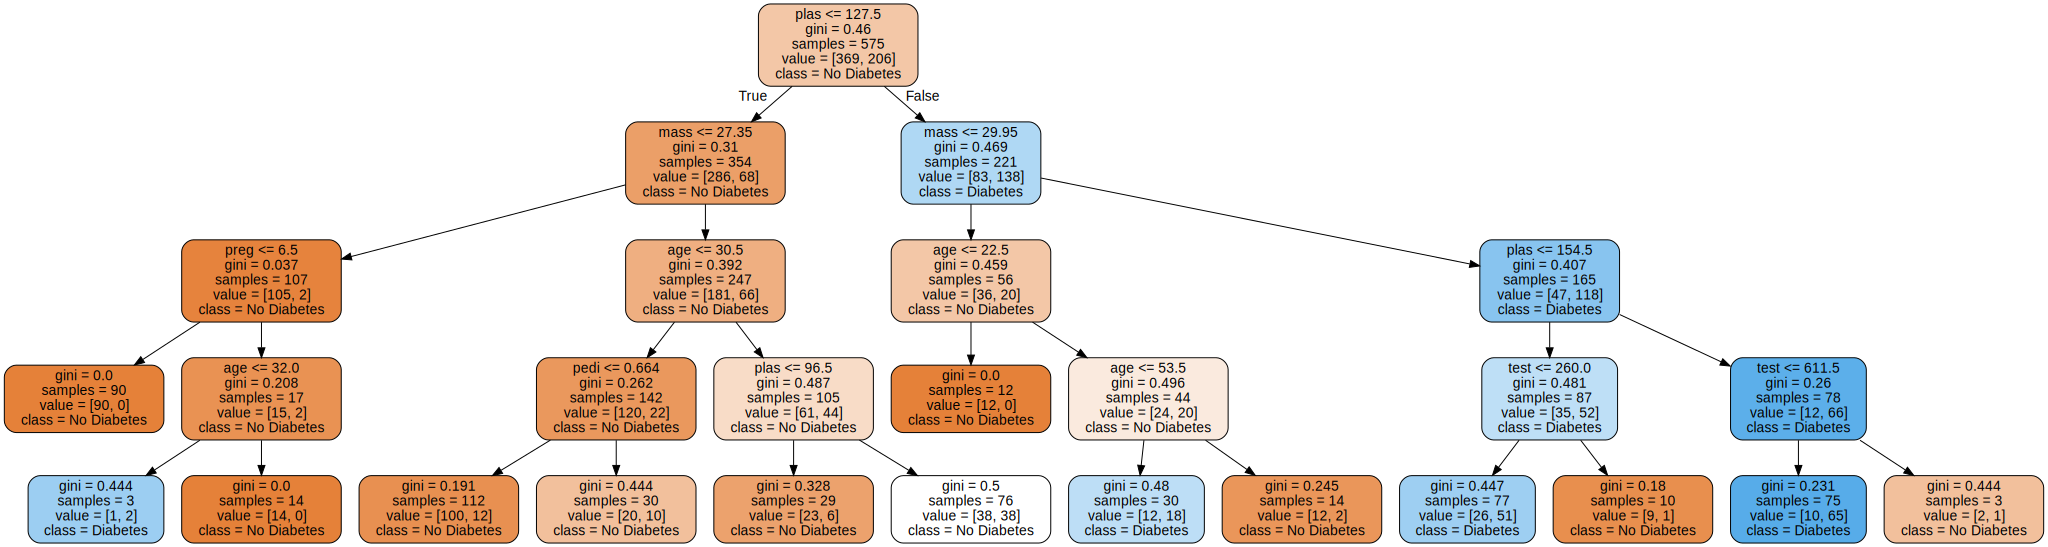

In [115]:
# your code here
# visualize the decision tree
feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=['No Diabetes','Diabetes'],  
                         filled=True, rounded=True,
                         max_depth=4) 

graph = graphviz.Source(dot_data)  
graph 

#### Use the graph above to answer the questions below

Question 1: If you add up the samples from the leaf nodes, how many samples are there?

575

Question 2: What do you think X[n] represents in the nodes from the graph? <br>

it represents the nth feature

Question 3: What is the root feature? Does it make sense as the root feature?

plasma glucose concentration, which makes sense (blood sugar level)


#### If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

it would increase the training accuracy but drastically decrease the test

#### Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and test data <br>
you only need to predict part of the training data

In [112]:
# your code here

# your code here
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=500, min_samples_leaf=1, random_state=0)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_train)
#print(y_pred)
print(accuracy_score(y_train, y_pred2))
y_pred_test = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred_test))


1.0
0.71875


# Random Forest

#### Create a model with sklearn's RandomForestClassifier and predict values on your test set

In [0]:
# your code here 
rf = RandomForestClassifier(n_estimators=9, criterion='gini', max_depth=4, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy<br>
how did the accuracy compare to the decision tree's accuracy?<br>

In [99]:
# your code here
accuracy_score(y_test, y_pred_rf) # better than decision tree (77 > 70)

0.7760416666666666

#### Print the 3 most important features<br>
hint: sklearn has an attribute to help you find these 

In [110]:
# your code here
important = list(rf.feature_importances_)
print(rf.feature_importances_)
for i in range(3):
  print(names[list(important).index(max(important))])
  del important[list(important).index(max(important))]

[0.051243   0.29777253 0.03253638 0.04082901 0.04074305 0.22184828
 0.12562195 0.18940579]
plas
test
mass


#### Find the accuracy for random forests with 1 to 100 trees, counting by 5. Plot these accuracies

In [111]:
for i in range(1, 100, 5):
  rf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=4, random_state=0)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X_test)
  print(accuracy_score(y_test, y_pred_rf))

0.6614583333333334
0.7916666666666666
0.78125
0.796875
0.8020833333333334
0.8020833333333334
0.796875
0.796875
0.8020833333333334
0.796875
0.796875
0.7916666666666666
0.7916666666666666
0.7916666666666666
0.796875
0.796875
0.796875
0.8020833333333334
0.8125
0.796875


#### Plot the roc_curve using predict_proba a function for our random forest model, and metrics. roc_curve <br>
It might help to google these functions and look at sklearn's documentation

In [0]:
# your code here

#### To view the trees in the random_forest you can loop through your model's '.estimators_" attribute <br>
If you have time look at pictures of the trees

In [121]:
# your code here
for tr in random_forest_estimators_:
  break

NameError: ignored